# Análise da Carteira

In [42]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
#start = date(date.today().year, 1, 1)
end = datetime.datetime.now()

## Portfolio Brasileiro Atual

### Pegando os dados na API do Yahoo

In [43]:
tickers = ['USIM5.SA', 'TIET4.SA', 'ENBR3.SA', 'ITUB4.SA', 'ABCB4.SA',
           'LEVE3.SA', 'ABEV3.SA', 'FLRY3.SA', 'ODPV3.SA', 'PSSA3.SA',
           'WHRL3.SA', 'WEGE3.SA', 'ROMI3.SA']

usim = web.DataReader(tickers[0], ds_yahoo, start, end)
tiet = web.DataReader(tickers[1], ds_yahoo, start, end)
enbr = web.DataReader(tickers[2], ds_yahoo, start, end)
itau = web.DataReader(tickers[3], ds_yahoo, start, end)
abcb = web.DataReader(tickers[4], ds_yahoo, start, end)
leve = web.DataReader(tickers[5], ds_yahoo, start, end)
abev = web.DataReader(tickers[6], ds_yahoo, start, end)
flry = web.DataReader(tickers[7], ds_yahoo, start, end)
odpv = web.DataReader(tickers[8], ds_yahoo, start, end)
pssa = web.DataReader(tickers[9], ds_yahoo, start, end)
whrl = web.DataReader(tickers[10], ds_yahoo, start, end)
wege = web.DataReader(tickers[11], ds_yahoo, start, end)
romi = web.DataReader(tickers[12], ds_yahoo, start, end)

arr = [usim, tiet, enbr, itau, abcb, leve, abev, flry, odpv, pssa, whrl, wege, romi]

## Normalizando o retorno diário de cada ativo do portfólio

In [44]:
for acao_df in (arr):
    acao_df['Retorno Normalizado'] = acao_df['Adj Close'] / acao_df.iloc[0]['Adj Close']

## Alocando cada ativo com um peso específico

In [63]:
 #arr = [usim,  tiet,  enbr,  itau, abcb, leve, abev,  flry, odpv,  pssa, whrl,  wege, romi]
pesos = [5.82, 13.35,  4.58, 14.12, 2.16, 8.56, 6.60, 11.36, 1.86, 18.43, 9.97,  2.87, 0.31]
#pesos = [3.65,  7.52, 22.82,  5.71, 0.84, 0.51, 8.60,  4.04, 6.50,  3.75, 1.52, 30.06, 4.44]

for acao_df, alocacao in zip((arr), pesos):
    acao_df['Alocacao'] = acao_df['Retorno Normalizado'] * alocacao

## Posição de cada ativo no portfólio

In [64]:
for acao_df in (arr):
    acao_df['Posicao'] = acao_df['Alocacao'] * 1000

In [65]:
todas_posicoes = [usim['Posicao'], tiet['Posicao'], enbr['Posicao'], abcb['Posicao'], itau['Posicao'],
                  leve['Posicao'], abev['Posicao'], flry['Posicao'], odpv['Posicao'], 
                  pssa['Posicao'], whrl['Posicao'], wege['Posicao'], romi['Posicao']]

# DF que terá colunas adicionadas como Total e Retorno Diário
portfolio_posicao = pd.concat(todas_posicoes, axis=1)

# DF que terá apenas as ações com o Adj Close column
portfolio_acoes = pd.concat(todas_posicoes, axis=1)

In [66]:
portfolio_posicao.columns = tickers
portfolio_acoes.columns = tickers

## Desempenho da carteira

In [67]:
portfolio_posicao['Total'] = portfolio_posicao.sum(axis=1)

In [68]:
print('Investimento inicial:')
print(portfolio_posicao['Total'][0])
print('Investimento final:')
print(round(portfolio_posicao['Total'][-1], 2))

Investimento inicial:
99990.0
Investimento final:
104586.32


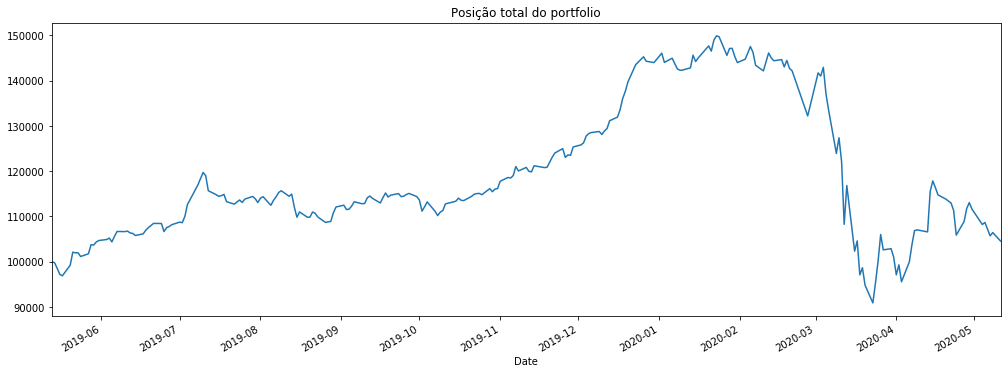

In [69]:
portfolio_posicao['Total'].plot(figsize=(17,6))
plt.title('Posição total do portfolio');

## Desempenho da Carteira Normalizada

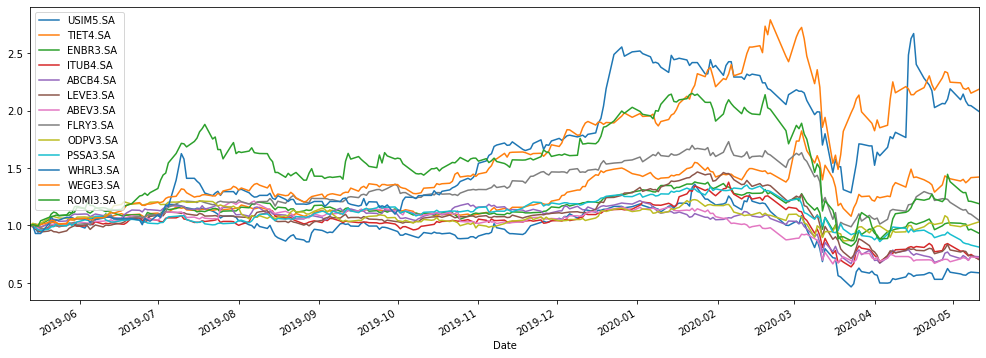

In [70]:
portfolio_normalizado = portfolio_acoes / portfolio_acoes.iloc[0]
portfolio_normalizado.plot(figsize=(17,6));

In [71]:
# remove a coluna 'Total', pega os valores da última linha e transforma em 1D-array
array_1d = portfolio_posicao.drop('Total', axis=1).values[-1:].ravel()

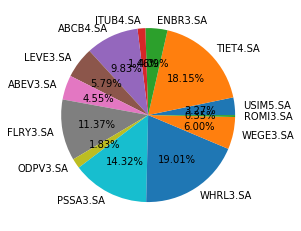

In [72]:
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(array_1d, labels=tickers, autopct='%1.2f%%')

## Retorno diário da carteira

In [73]:
portfolio_posicao['Retorno Diario'] = portfolio_posicao['Total'].pct_change(1)

### Rendimento médio diário

In [74]:
# Média de retorno diário
round_ret_medio_diario = round(portfolio_posicao['Retorno Diario'].mean() * 100, 2)
print('Essa carteira rende em média {}% diariamente'.format(round_ret_medio_diario))

Essa carteira rende em média 0.04% diariamente


In [75]:
portfolio_posicao['Retorno Diario'].describe()

count    246.000000
mean       0.000419
std        0.021551
min       -0.124116
25%       -0.007405
50%        0.002093
75%        0.009270
max        0.083672
Name: Retorno Diario, dtype: float64

### Desvio Padrão

In [76]:
# Desvio Padrão do retorno diário
std = round(portfolio_posicao['Retorno Diario'].std(), 5)
print('Essa carteira tem um Desvio Padrão de {}'.format(std))

Essa carteira tem um Desvio Padrão de 0.02155


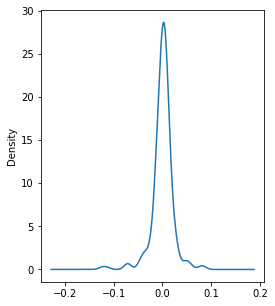

In [77]:
# Gráfico de densidade
portfolio_posicao['Retorno Diario'].plot(kind='kde', figsize=(4,5));

In [78]:
print('Foram analisados {} pregões dos quais:'.format(len(portfolio_posicao)))
print('{} dias foram de queda.'
      .format(len(portfolio_posicao[portfolio_posicao['Retorno Diario'] > 0])))
print('{} dias foram de de alta.'
      .format(len(portfolio_posicao[portfolio_posicao['Retorno Diario'] < 0])))

Foram analisados 247 pregões dos quais:
144 dias foram de queda.
102 dias foram de de alta.


## Retorno Total da Carteira

In [79]:
retorno_total_acumulado = 100 * (portfolio_posicao['Total'][-1] / portfolio_posicao['Total'][0] - 1)
round_ret = round(retorno_total_acumulado, 3)
print('Essa carteira rendeu {}%'.format(round_ret))

Essa carteira rendeu 4.597%
